In [ ]:
# Code Citations:
# https://medium.com/@krishna.ramesh.tx/training-a-cnn-to-distinguish-between-mnist-digits-using-pytorch-620f06aa9ffa
# https://www.analyticsvidhya.com/blog/2019/10/building-image-classification-models-cnn-pytorch/

## Import Packages

In [1]:
import pickle
# importing the libraries
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [12]:
import pickle
# importing the libraries
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
#pytorch utility imports
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import make_grid
import pickle
#neural net imports
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
#import external libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import math
%matplotlib inline

## Mount Google Drive

Make sure you have all of the datasets in your google drive. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


_NOTE: In the code block below, make sure you change the paths accordingly to your drive :)_

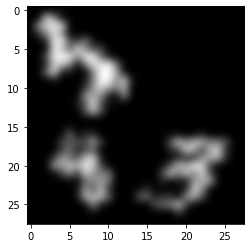

Label:  4.0
60000


In [3]:
# Training data and labels
data_x = pickle.load( open('drive/MyDrive/Train.pkl', 'rb'))
data_y = np.genfromtxt('drive/MyDrive/Train_labels.csv', delimiter=',')

# Test data for Kaggle submission 
test_x = pickle.load( open( 'drive/MyDrive/Test.pkl', 'rb' ))
test_y = np.genfromtxt('drive/MyDrive/ExampleSubmissionRandom.csv', delimiter=',')

# Sample a random image from the dataset and print its class label
test_sample = 155 
plt.imshow(data_x[test_sample][0], cmap='gray', interpolation="bicubic")
plt.show()
print("Label: ", data_y[test_sample][1])
print(data_x.shape[0])

In [ ]:
# Image Rotation - NOT WORKING 
# from keras_preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# #img = load_img('Screenshot_47.png')

# from numpy import expand_dims
# from keras_preprocessing.image import load_img
# from keras_preprocessing.image import img_to_array
# from keras_preprocessing.image import ImageDataGenerator
# import matplotlib.pyplot  as plt

# rotated_train_images = []
# rotated_train_labels = []

# for j in range(train_images.shape[0]):
# #for j in range(10):
#   # load the image
#   plt.figure(figsize=(45,30))

#   # convert to numpy array
#   data = img_to_array(train_images[j])
#   rotated_train_images.append(train_images[j])
#   rotated_train_labels.append(train_labels[j])
#   #print(data.shape)
#   # expand dimension to one sample
#   samples = expand_dims(data, 0)

#   datagen = ImageDataGenerator(featurewise_center=True,rotation_range=(0-10),brightness_range=[0,1])
#   # prepare iterator
#   it = datagen.flow(samples, batch_size=1)

#   # generate samples and plot
#   for i in range(6):
#     # define subplot
#     #plt.subplot(330 + 1 + i)
#     # generate batch of images
#     batch = it.next()
#     # convert to unsigned integers for viewing
#     image = batch[0].astype('uint8')
#     rotated_train_images.append(image)
#     # plot raw pixel data
#     rotated_train_labels.append(train_labels[j])
# print(len(rotated_train_images))
# print(len(rotated_train_labels))

## Split and Convert Data To Pytorch Tensors

In [4]:
data_x_tmp = []
test_x_tmp = []
for i in data_x:
  data_x_tmp.append(i[0])

for i in test_x:
  test_x_tmp.append(i[0])

data_x = np.asarray(data_x_tmp)
test_x = np.asarray(test_x_tmp)
print("Training Data Shape: ", data_x.shape)
print("Test Data Shape: ", test_x.shape)

# Remove invalid first element and index elements from class labels
data_y = data_y[1:]
data_y = data_y[:,1]
data_y = np.int_(data_y)

test_y = test_y[1:]
test_y = test_y[:,1]
test_y = np.int_(test_y)

Training Data Shape:  (60000, 28, 28)
Test Data Shape:  (10000, 28, 28)


In [5]:
train_x, val_x, train_y, val_y = train_test_split(data_x, data_y, test_size = 0.1)
(train_x.shape, train_y.shape), (val_x.shape, val_y.shape)

(((54000, 28, 28), (54000,)), ((6000, 28, 28), (6000,)))

In [6]:
# Convert training images into torch format
train_x = train_x.reshape(54000, 1, 28, 28)
train_x  = torch.from_numpy(train_x)

test_x = test_x.reshape(10000, 1, 28, 28)
test_x = torch.from_numpy(test_x)

# converting the target into torch format
train_y = train_y.astype(int);
train_y = torch.from_numpy(train_y)

test_y = test_y.astype(int);
test_y = torch.from_numpy(test_y)

# shape of training data
print("Shape of training data and labels")
train_x.shape, train_y.shape

# shape of training data
print("Shape of test data")
test_x.shape, test_y.shape


Shape of training data and labels
Shape of test data


(torch.Size([10000, 1, 28, 28]), torch.Size([10000]))

In [7]:
# converting validation images into torch format
val_x = val_x.reshape(6000, 1, 28, 28)
val_x  = torch.from_numpy(val_x)

# converting the target into torch format
val_y = val_y.astype(int);
val_y = torch.from_numpy(val_y)

# shape of validation data
val_x.shape, val_y.shape

(torch.Size([6000, 1, 28, 28]), torch.Size([6000]))

In [10]:
# converting original dataset to final training set
final_x = data_x.reshape(60000, 1, 28, 28)
final_x = torch.from_numpy(final_x)

final_y = data_y.astype(int);
fianl_y = torch.from_numpy(final_y)

In [13]:
batch_size = 128 

# converting training images into torch format
train_tensor_x = torch.Tensor(train_x)
val_tensor_x = torch.Tensor(val_x)
test_tensor_x = torch.Tensor(test_x)
final_tensor_x = torch.Tensor(final_x)

# converting the target into torch format (adding indices)
train_tensor_y = torch.Tensor(train_y)
val_tensor_y = torch.Tensor(val_y)
test_tensor_y = torch.Tensor(test_y)
final_tensor_y = torch.Tensor(final_y)

train_dataset = TensorDataset(train_tensor_x, train_tensor_y) # create your datset
val_dataset = TensorDataset(val_tensor_x,val_tensor_y) # create your datset
test_dataset = TensorDataset(test_tensor_x,test_tensor_y) # create your datset
final_dataset = TensorDataset(final_tensor_x,final_tensor_y) # create your datset

# Final datasets
train_dl = DataLoader(train_dataset, batch_size=batch_size)
val_dl = DataLoader(val_dataset, batch_size=batch_size)
test_dl = DataLoader(test_dataset, batch_size=batch_size)
final_dl = DataLoader(final_dataset, batch_size=batch_size)

# Display the first N batches of data
N = 4
for i, (images, labels) in enumerate(train_dl):
    print('Batch index: ', i)
    print('Batch size: ', images.size())
    print('Batch label: ', labels)
    if(i > N):
      break

Batch index:  0
Batch size:  torch.Size([128, 1, 28, 28])
Batch label:  tensor([9, 2, 3, 5, 3, 0, 3, 3, 0, 2, 4, 6, 3, 1, 4, 8, 7, 3, 0, 0, 4, 9, 5, 9,
        8, 3, 6, 8, 4, 7, 9, 0, 2, 7, 4, 2, 3, 9, 0, 5, 1, 0, 0, 6, 6, 8, 3, 8,
        6, 0, 9, 2, 8, 7, 1, 2, 6, 0, 6, 1, 8, 9, 6, 3, 0, 1, 2, 1, 2, 0, 4, 2,
        3, 3, 8, 8, 3, 7, 6, 3, 4, 5, 9, 6, 6, 8, 4, 6, 2, 9, 3, 9, 9, 4, 1, 2,
        0, 3, 7, 5, 7, 2, 5, 4, 3, 3, 7, 5, 8, 9, 7, 6, 0, 3, 9, 5, 7, 7, 9, 2,
        9, 8, 5, 0, 2, 2, 2, 9])
Batch index:  1
Batch size:  torch.Size([128, 1, 28, 28])
Batch label:  tensor([3, 6, 8, 8, 9, 9, 4, 4, 5, 6, 0, 5, 0, 2, 4, 6, 5, 1, 2, 0, 4, 0, 6, 2,
        4, 4, 4, 2, 9, 4, 2, 6, 5, 3, 8, 9, 7, 4, 6, 6, 4, 9, 4, 9, 6, 3, 2, 0,
        7, 4, 8, 3, 8, 6, 2, 3, 9, 9, 7, 2, 2, 3, 0, 2, 1, 4, 3, 5, 2, 2, 3, 3,
        1, 2, 2, 1, 4, 2, 8, 5, 9, 8, 8, 4, 0, 1, 4, 5, 6, 0, 1, 7, 4, 2, 6, 4,
        3, 9, 7, 4, 7, 0, 4, 9, 5, 5, 4, 1, 5, 4, 8, 9, 3, 1, 1, 9, 4, 1, 9, 2,
        9, 1, 4, 1, 2, 

## Define The Model

In [14]:
class ResBlock(nn.Module):
    def __init__(self, in_channels, out_channels, downsample):
        super().__init__()
        if downsample:
            self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=2, padding=1)
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=2),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1)
            self.shortcut = nn.Sequential()

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)

    def forward(self, input):
        shortcut = self.shortcut(input)
        input = nn.ReLU()(self.bn1(self.conv1(input)))
        input = nn.ReLU()(self.bn2(self.conv2(input)))
        input = input + shortcut
        return nn.ReLU()(input)

In [15]:
# Squeeze and Excite Layer
# Code citation: https://towardsdatascience.com/introduction-to-squeeze-excitation-networks-f22ce3a43348
class SELayer(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SELayer, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )
    def forward(self, x):
            b, c, _, _ = x.size()
            y = self.avg_pool(x).view(b, c)
            y = self.fc(y).view(b, c, 1, 1)
            return x * y.expand_as(x)
 

In [25]:
"""
CURRENT BEST MODEL
"""
class Net(nn.Module):
    def __init__(self, resblock, outputs=10):
        super().__init__()
        self.network = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=2),
        resblock(32, 32, downsample=False),
        SELayer(32, 2),
        nn.ReLU(),
        nn.AvgPool2d(1, stride=1),
        
        nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=2),
        resblock(64, 64, downsample=False),
        SELayer(64, 16),
        nn.ReLU(),
        nn.AvgPool2d(1, stride=1),

        nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=0),
        resblock(128, 128, downsample=False),
        SELayer(128, 64),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),

        nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=0),
        resblock(256, 256, downsample=False),
        resblock(256, 512, downsample=True),
        SELayer(512, 2),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),

        resblock(512, 512, downsample=False),
        resblock(512, 1024, downsample=True),
        nn.AdaptiveAvgPool2d(1),
        nn.Flatten(),
        nn.Linear(1024, outputs)
      )

    def forward(self, input):
        y = self.network(input)
        return y 
 

# Define Training Functions

In [17]:
# Validation Function
# Code Citation: https://medium.com/@krishna.ramesh.tx/training-a-cnn-to-distinguish-between-mnist-digits-using-pytorch-620f06aa9ffa
def validate(model, data):
    total = 0
    correct = 0
    for i, (images, labels) in enumerate(data):
        images = images.cuda()
        x = model(images)
        value, pred = torch.max(x,1)
        pred = pred.data.cpu()
        total += x.size(0)
        correct += torch.sum(pred == labels)
    return correct*100./total

In [18]:
# Training Function
# Code Citation: https://medium.com/@krishna.ramesh.tx/training-a-cnn-to-distinguish-between-mnist-digits-using-pytorch-620f06aa9ffa
import copy 
from torchsummary import summary

def train(numb_epoch=3, dataset=train_dl, lr=1e-3, device="cpu"):
    resnet18 = Net(ResBlock, outputs=10)
    cnn = resnet18.to(torch.device("cuda:0" if torch.cuda.is_available() else "cpu"))
    accuracies = []
    # cnn = create_model().to(device)
    cec = nn.CrossEntropyLoss()
    optimizer = optim.Adam(cnn.parameters(), lr=lr)
    max_accuracy = 0
    for epoch in range(numb_epoch):
        for i, (images, labels) in enumerate(dataset):
            images = images.to(device)
            # labels = labels.to(device)
            labels = labels.type(torch.cuda.LongTensor)
            optimizer.zero_grad()
            pred = cnn(images)
            loss = cec(pred, labels)
            loss.backward()
            optimizer.step()
        accuracy = float(validate(cnn, val_dl))
        accuracies.append(accuracy)
        if accuracy > max_accuracy:
            best_model = copy.deepcopy(cnn)
            max_accuracy = accuracy
            print("Saving Best Model with Accuracy: ", accuracy)
        print('Epoch:', epoch+1, "Accuracy :", accuracy, '%')
    plt.plot(accuracies)
    return best_model

## Train on Training Data

In [19]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
    print("No Cuda Available")
    
device

device(type='cuda', index=0)

Saving Best Model with Accuracy:  91.41666412353516
Epoch: 1 Accuracy : 91.41666412353516 %
Saving Best Model with Accuracy:  94.19999694824219
Epoch: 2 Accuracy : 94.19999694824219 %
Saving Best Model with Accuracy:  94.58333587646484
Epoch: 3 Accuracy : 94.58333587646484 %
Saving Best Model with Accuracy:  94.96666717529297
Epoch: 4 Accuracy : 94.96666717529297 %
Epoch: 5 Accuracy : 94.8499984741211 %


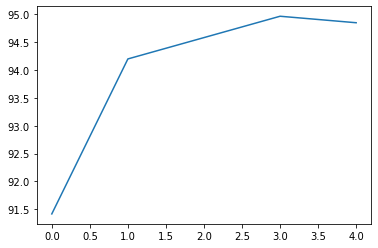

In [26]:
cnn = train(5, dataset=train_dl, device=device)

## Train on Entire Dataset

Saving Best Model with Accuracy:  91.41666412353516
Epoch: 1 Accuracy : 91.41666412353516 %
Saving Best Model with Accuracy:  94.18333435058594
Epoch: 2 Accuracy : 94.18333435058594 %


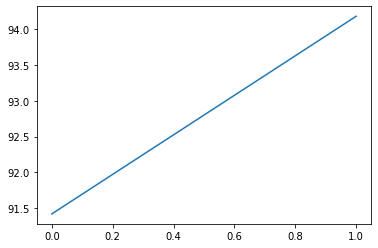

In [44]:
# Train the final model
cnn = train(2, dataset=final_dl, device=device)

## Predict Testing Set

In [45]:
def predict_final(model, data):
    y_pred = []
    for i, (images, labels) in enumerate(data):
        images = images.cuda()
        x = model(images)
        value, pred = torch.max(x, 1)
        pred = pred.data.cpu()
        y_pred.extend(list(pred.numpy()))
    return np.array(y_pred) 

In [46]:
y_pred = predict_final(cnn, test_dl)

## Save Testing Set Predictions (CSV)

In [47]:
y_final = np.zeros((len(y_pred), 2))
for i in range(len(y_pred)):
  y_final[i, :] = np.array([i, int(y_pred[i])])

In [48]:
# save array into csv file
np.savetxt("final.csv", 
           y_final,
           '%i,%i',
           delimiter = ",")